In [1]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('threads_std.csv') 
# print(df.groupby(['total_log_yes (in us)','num_log_yes']).mean().reset_index())

COMMIT_ALG             ONE_PC     TWO_PC
NUM_SERVER_THREADS                      
2                    65.30812   51.22558
4                   122.39060  102.14634
8                   232.52440  180.03120
16                  468.16840  359.20780
32                  692.98120  611.71640
64                  452.55980  452.48460
128                 229.73520  235.53000


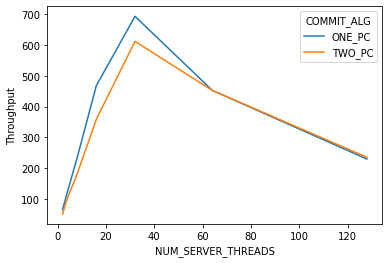

In [2]:
grouped = df.groupby(['COMMIT_ALG', 'NUM_SERVER_THREADS'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='NUM_SERVER_THREADS', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
fig = plot.get_figure()
fig.savefig("threads_zipf0_std.png")


In [3]:
latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['NUM_SERVER_THREADS'] == 16]

<ipython-input-3-f52b7dcd3b27>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()


   COMMIT_ALG  NUM_SERVER_THREADS  execute_phase (in us)  \
3      ONE_PC                  16               243.2970   
10     TWO_PC                  16               318.5376   

    prepare_phase (in us)  commit_phase (in us)  abort (in us)  
3                24460.58              1.138958            0.0  
10               24111.48           8479.968000            0.0  


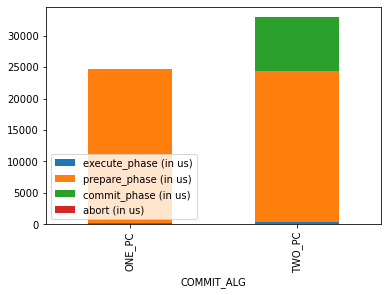

In [4]:
print(result)
result = result.drop(['NUM_SERVER_THREADS'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_zipf09_std.png")